# Import raw data

In [1]:
import pandas as pd
import json
from sklearn import preprocessing
from pathlib import Path
cwd = Path('.')

videos_df=pd.read_csv(cwd/'output'/"videos.csv",usecols=[0,1,3,4], error_bad_lines=False)
videos_df.drop_duplicates (inplace = True)

videos_df.head()

,video_id,title,category_id,tags
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,24,logan paul vlog|logan paul|logan|paul|olympics...
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2,cLdxuaxaQwc,My Response,22,[none]
3,WYYvHb03Eog,Apple iPhone X first look,28,apple iphone x hands on|Apple iPhone X|iPhone ...
4,sjlHnJvXdQs,iPhone X (parody),23,jacksfilms|parody|parodies|iphone|iphone x|iph...


In [2]:
with open(cwd/'data_scraper'/'kaggle'/'GB_category_id.json') as json_file:
    gb_json = json.load(json_file)

id_to_category = {}
for i in gb_json['items']:
    category = i['snippet']['title']
    id = int(i['id'])
    id_to_category[id]= category
training_id = []
for i in id_to_category:
    training_id.append(i)
    
id_to_category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

# Cleaning the text 

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [4]:
def clean_and_join_title_and_tags(row, to_stem):
    # join title and tags
    text = row['title'] + ' ' + " ".join(row['tags'].split("|"))
    # tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [token for token in tokens if token.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    # stemming words
    if to_stem:
        porter = PorterStemmer()
        words = [porter.stem(word) for word in words]
    return " ".join(words)

to_stem = False
videos_df['title_and_tags'] = videos_df.apply(lambda row: clean_and_join_title_and_tags(row, to_stem), axis=1)

In [5]:
videos_df = videos_df.drop_duplicates(subset='title_and_tags', keep='first')

In [6]:
videos_df

,video_id,title,category_id,tags,title_and_tags
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,24,logan paul vlog|logan paul|logan|paul|olympics...,year vlogging logan paul changed youtube forev...
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,iphone x introducing iphone x apple apple ipho...
2,cLdxuaxaQwc,My Response,22,[none],response none
3,WYYvHb03Eog,Apple iPhone X first look,28,apple iphone x hands on|Apple iPhone X|iPhone ...,apple iphone x first look apple iphone x hands...
4,sjlHnJvXdQs,iPhone X (parody),23,jacksfilms|parody|parodies|iphone|iphone x|iph...,iphone x parody jacksfilms parody parodies iph...
...,...,...,...,...,...
15869,V3jY8-VzSEA,Gucci Mane - Back On [Official Music Video],10,gucci mane|gucci|mr davis|trap|trap god|1017|g...,gucci mane back official music video gucci man...
15872,wOcRH5GbqTQ,Knuckle Puck - Gone (Official Music Video),10,rise records|knuckle puck|gone|shapeshifter|of...,knuckle puck gone official music video rise re...
15888,NRjDqw1w7k8,ZHU - Waters of Monaco (Adidas China Pure Edit),10,ZHU|Waters|of|Monaco|(Adidas|China|Pure|Edit)|...,zhu waters monaco adidas china pure edit zhu w...
15895,K2SCpgCurVQ,Destiny 2: Wardcliff Coil Glitch! How To Get U...,20,destiny 2 unlimited power ammo|unlimited power...,destiny wardcliff coil glitch get unlimited po...


In [7]:
videos_df['title_and_tags'] = videos_df['title_and_tags'].apply(str)

In [8]:
df = videos_df.groupby('category_id')['title_and_tags'].apply(list)

In [9]:
df = df.reset_index()

In [10]:
df=df.dropna()

In [11]:
df['title_and_tags'].dtype

dtype('O')

In [12]:
df['title and tags'] = df.apply(lambda row: " ".join(row['title_and_tags']), axis=1)

In [13]:
df['category'] = df['category_id'].map(id_to_category)
df['id'] = df['category_id']
df.head()

,category_id,title_and_tags,title and tags,category,id
0,1,[disaster artist official trailer hd films tra...,disaster artist official trailer hd films trai...,Film & Animation,1
1,2,[last week tonight john oliver sep last week t...,last week tonight john oliver sep last week to...,Autos & Vehicles,2
2,10,[fergie already know nicki minaj fergie alread...,fergie already know nicki minaj fergie already...,Music,10
3,15,"[wishes fitting maru cat kitty pets まる 猫 ねこ, k...",wishes fitting maru cat kitty pets まる 猫 ねこ kil...,Pets & Animals,15
4,17,[chargers broncos nfl week game highlights nfl...,chargers broncos nfl week game highlights nfl ...,Sports,17


In [14]:
df = df[['id','category','title and tags']]

In [15]:
df

,id,category,title and tags
0,1,Film & Animation,disaster artist official trailer hd films trai...
1,2,Autos & Vehicles,last week tonight john oliver sep last week to...
2,10,Music,fergie already know nicki minaj fergie already...
3,15,Pets & Animals,wishes fitting maru cat kitty pets まる 猫 ねこ kil...
4,17,Sports,chargers broncos nfl week game highlights nfl ...
5,19,Travel & Events,salted egg crab street food tour old airport r...
6,20,Gaming,season preview white people renovating houses ...
7,22,People & Blogs,response none attacked police dog roman atwood...
8,23,Comedy,iphone x parody jacksfilms parody parodies iph...
9,24,Entertainment,year vlogging logan paul changed youtube forev...


In [16]:
df_clean = df.drop([14,15])

In [17]:
df_clean

,id,category,title and tags
0,1,Film & Animation,disaster artist official trailer hd films trai...
1,2,Autos & Vehicles,last week tonight john oliver sep last week to...
2,10,Music,fergie already know nicki minaj fergie already...
3,15,Pets & Animals,wishes fitting maru cat kitty pets まる 猫 ねこ kil...
4,17,Sports,chargers broncos nfl week game highlights nfl ...
5,19,Travel & Events,salted egg crab street food tour old airport r...
6,20,Gaming,season preview white people renovating houses ...
7,22,People & Blogs,response none attacked police dog roman atwood...
8,23,Comedy,iphone x parody jacksfilms parody parodies iph...
9,24,Entertainment,year vlogging logan paul changed youtube forev...


# Document-Term Matrix 

In [18]:
'''Produce a document term matrix of words for each category '''
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(df_clean['title and tags'])
data_dtm = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm['category'] = df_clean['category']
data_dtm = data_dtm.set_index('category')
data_dtm

,aa,aac,aaron,ab,abandoned,abbey,abbott,abby,abc,abduction,...,피면,하이라이트,한국,한국말,한국비트박스,한국비트박스tv,한국비트박스티비,한류,호시,홍콩
category,,,,,,,,,,,,,,,,,,,,,
Film & Animation,0,0,1,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Autos & Vehicles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Music,2,1,2,0,0,0,0,0,0,0,...,2,2,1,0,1,1,1,3,2,0
Pets & Animals,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sports,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Travel & Events,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gaming,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
People & Blogs,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,0


# Let's visualize the results


In [19]:
data=data_dtm.transpose()
data

category,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Travel & Events,Gaming,People & Blogs,Comedy,Entertainment,News & Politics,Howto & Style,Education,Science & Technology
aa,0,0,2,0,0,0,0,0,0,0,0,0,0,0
aac,0,0,1,0,0,0,0,0,0,0,0,0,0,0
aaron,1,0,2,0,8,0,0,0,0,14,0,0,0,0
ab,2,0,0,0,0,0,0,0,0,4,0,0,0,0
abandoned,0,0,0,1,0,0,0,0,0,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한국비트박스tv,0,0,1,0,0,0,0,0,0,0,0,0,0,0
한국비트박스티비,0,0,1,0,0,0,0,0,0,0,0,0,0,0
한류,0,0,3,0,0,0,0,0,0,0,0,0,0,0
호시,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [20]:
'''Create dictionary to count top 10 words in each category'''
top_dict = {}
for c in data.columns:
    try:
        top = data[c].sort_values(ascending = False).head(10)
        top_dict[c] = list(zip(top.index, top.values))
    except:
        continue
top_dict

{'Film & Animation': [('trailer', 119),
  ('movie', 95),
  ('film', 66),
  ('rick', 58),
  ('official', 51),
  ('morty', 47),
  ('disney', 36),
  ('season', 32),
  ('wonder', 29),
  ('theory', 28)],
 'Autos & Vehicles': [('car', 59),
  ('crash', 21),
  ('audi', 14),
  ('ford', 13),
  ('lexus', 11),
  ('polestar', 11),
  ('cars', 11),
  ('driving', 9),
  ('gt', 9),
  ('sport', 9)],
 'Music': [('music', 355),
  ('video', 320),
  ('official', 241),
  ('new', 133),
  ('records', 121),
  ('pop', 100),
  ('live', 94),
  ('audio', 90),
  ('song', 78),
  ('cover', 70)],
 'Pets & Animals': [('dog', 111),
  ('cat', 94),
  ('simon', 42),
  ('dogs', 39),
  ('rescue', 38),
  ('animal', 36),
  ('spider', 34),
  ('cats', 33),
  ('animals', 32),
  ('videos', 24)],
 'Sports': [('sp', 299),
  ('football', 205),
  ('vs', 169),
  ('highlights', 157),
  ('sports', 117),
  ('league', 82),
  ('espn', 78),
  ('soccer', 77),
  ('chelsea', 69),
  ('ti', 68)],
 'Travel & Events': [('food', 61),
  ('street', 30),

In [21]:
words = []

for category in data.columns:
    try:
        top = [word for (word, count) in top_dict[category]]
    except:
        # some categories has less than 10 top words
        pass
    for t in top:
        words.append(t)
words   

['trailer',
 'movie',
 'film',
 'rick',
 'official',
 'morty',
 'disney',
 'season',
 'wonder',
 'theory',
 'car',
 'crash',
 'audi',
 'ford',
 'lexus',
 'polestar',
 'cars',
 'driving',
 'gt',
 'sport',
 'music',
 'video',
 'official',
 'new',
 'records',
 'pop',
 'live',
 'audio',
 'song',
 'cover',
 'dog',
 'cat',
 'simon',
 'dogs',
 'rescue',
 'animal',
 'spider',
 'cats',
 'animals',
 'videos',
 'sp',
 'football',
 'vs',
 'highlights',
 'sports',
 'league',
 'espn',
 'soccer',
 'chelsea',
 'ti',
 'food',
 'street',
 'chinese',
 'singapore',
 'china',
 'ship',
 'tour',
 'timelapse',
 'eat',
 'best',
 'game',
 'nintendo',
 'games',
 'gameplay',
 'video',
 'trailer',
 'snes',
 'cuphead',
 'mario',
 'project',
 'makeup',
 'vlog',
 'buzzfeed',
 'family',
 'safiya',
 'tutorial',
 'video',
 'vlogs',
 'haul',
 'life',
 'funny',
 'comedy',
 'video',
 'fallon',
 'nbc',
 'jimmy',
 'interview',
 'humor',
 'sketch',
 'talk',
 'late',
 'trailer',
 'funny',
 'video',
 'movie',
 'news',
 'celebri

In [22]:
'''Show words which appear most commonly across categories'''

from collections import Counter
Counter(words).most_common()

[('video', 6),
 ('trailer', 3),
 ('new', 3),
 ('movie', 2),
 ('official', 2),
 ('live', 2),
 ('vs', 2),
 ('makeup', 2),
 ('vlog', 2),
 ('tutorial', 2),
 ('haul', 2),
 ('life', 2),
 ('funny', 2),
 ('comedy', 2),
 ('news', 2),
 ('science', 2),
 ('film', 1),
 ('rick', 1),
 ('morty', 1),
 ('disney', 1),
 ('season', 1),
 ('wonder', 1),
 ('theory', 1),
 ('car', 1),
 ('crash', 1),
 ('audi', 1),
 ('ford', 1),
 ('lexus', 1),
 ('polestar', 1),
 ('cars', 1),
 ('driving', 1),
 ('gt', 1),
 ('sport', 1),
 ('music', 1),
 ('records', 1),
 ('pop', 1),
 ('audio', 1),
 ('song', 1),
 ('cover', 1),
 ('dog', 1),
 ('cat', 1),
 ('simon', 1),
 ('dogs', 1),
 ('rescue', 1),
 ('animal', 1),
 ('spider', 1),
 ('cats', 1),
 ('animals', 1),
 ('videos', 1),
 ('sp', 1),
 ('football', 1),
 ('highlights', 1),
 ('sports', 1),
 ('league', 1),
 ('espn', 1),
 ('soccer', 1),
 ('chelsea', 1),
 ('ti', 1),
 ('food', 1),
 ('street', 1),
 ('chinese', 1),
 ('singapore', 1),
 ('china', 1),
 ('ship', 1),
 ('tour', 1),
 ('timelapse', 

In [23]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['video', 'trailer', 'new']

In [24]:
from sklearn.feature_extraction import text
from wordcloud import WordCloud

stop_words = text.ENGLISH_STOP_WORDS.union (add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42,collocations=False)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20,10]

cat_names = df_clean['category'].tolist()

df_clean.set_index('category',inplace=True)
df_clean

,id,title and tags
category,,
Film & Animation,1,disaster artist official trailer hd films trai...
Autos & Vehicles,2,last week tonight john oliver sep last week to...
Music,10,fergie already know nicki minaj fergie already...
Pets & Animals,15,wishes fitting maru cat kitty pets まる 猫 ねこ kil...
Sports,17,chargers broncos nfl week game highlights nfl ...
Travel & Events,19,salted egg crab street food tour old airport r...
Gaming,20,season preview white people renovating houses ...
People & Blogs,22,response none attacked police dog roman atwood...
Comedy,23,iphone x parody jacksfilms parody parodies iph...


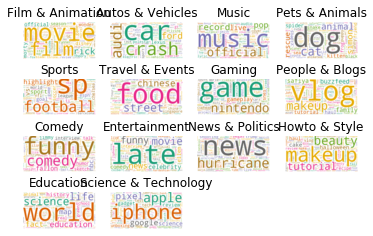

In [25]:
for index, cat in enumerate(data.columns):
    try:
        wc.generate(df_clean['title and tags'][cat])
    except:
        pass
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat_names[index])
plt.show()